<a href="https://colab.research.google.com/github/SohrabSamimi/Training-a-CNN-on-the-CIFAR10-dataset/blob/main/Training_a_CNN_on_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [108]:
import math
import torch
import torch.nn as nn
device = torch.device('cuda:0')


In [109]:
%matplotlib inline

In [110]:
import torch
import numpy as np
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [111]:
transform = transforms.Compose(
             [transforms.ToTensor(),
             transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data',train=True,
                                        download=True,transform=transform)  

trainloader = torch.utils.data.DataLoader(trainset,batch_size=30,num_workers=4,
                                          shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=30,num_workers=4,
                                         shuffle=False)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')                                          

Files already downloaded and verified
Files already downloaded and verified


In [112]:
def imshow(img):
    a = img/2 + 0.5
    npimg = a.numpy()
    plt.imshow(np.transpose(a,(1,2,0)))
    plt.show()

We show below 10 images of the dataset and then print the associated class

torch.Size([30, 3, 32, 32])


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f5205bb3c10>Exception ignored in: 
<function _MultiProcessingDataLoaderIter.__del__ at 0x7f5205bb3c10>Traceback (most recent call last):

Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1466, in __del__
        self._shutdown_workers()self._shutdown_workers()
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers
    
if w.is_alive():  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1449, in _shutdown_workers

    if w.is_alive():  File "/usr/lib/python3.8/multiprocessing/process.py", line 160, in is_alive
    
assert self._parent_pid == os.getpid(), 'can only test a child process'  File "/usr/lib/python3.8/multiprocessing/process.py", line 160, in 

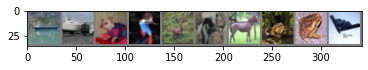

In [113]:
dataiter = iter(trainloader)
images,labels = next(dataiter)
print(images.shape)
imshow(torchvision.utils.make_grid(images[:10],nrow=10))


In [114]:
print(' '.join('%5s' % classes[labels[j]] for j in range(10)))

 ship  ship   dog  bird  deer  bird horse  frog  frog plane


In [115]:
import torch.nn.functional as F

class ConvNet(nn.Module):

    def __init__(self):
        super(ConvNet,self).__init__()

        self.conv1 = nn.Conv2d(3,6,5)     # 3 is the nb of input channels(RGB image),
                                          # 6 is the desired number of output channels, 5 is the kernel size
        self.max_pool = nn.MaxPool2d(2,2) # reduces (again) the image size by taking the max over 2x2 patches
        self.conv2 = nn.Conv2d(6,16,5)
        self.fc1 = nn.Linear(16*5*5,120) # to understand why we use 16*5*5 take a look at the forward below
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        # we use 10 as the final number of neurons because there are 10 classes

    def forward(self,x):
        
        x = self.max_pool(F.relu(self.conv1(x)))   
        x = self.max_pool(F.relu(self.conv2(x))) 
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        return x



In [116]:
CNet = ConvNet().to(device)

In [117]:
n_epochs=40

In [118]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(CNet.parameters(),lr=0.001,momentum=0.9)

In [119]:
for ep in range(n_epochs):
    for int,x in enumerate(trainloader,0):
        image,label = x
        image = image.to(device)
        label = label.to(device)
        y_pred = CNet(image)
        loss = criterion(y_pred,label)
        


        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f'epoch {ep} loss {loss}')    


epoch 0 loss 1.7491216659545898
epoch 1 loss 1.7160930633544922
epoch 2 loss 1.418973684310913
epoch 3 loss 2.080190896987915
epoch 4 loss 1.4492571353912354
epoch 5 loss 1.4727989435195923
epoch 6 loss 1.0014984607696533
epoch 7 loss 1.2606950998306274
epoch 8 loss 1.1950805187225342
epoch 9 loss 0.8865969777107239
epoch 10 loss 0.9072355031967163
epoch 11 loss 0.8814965486526489
epoch 12 loss 0.6407976150512695
epoch 13 loss 0.5763235688209534
epoch 14 loss 0.864924430847168
epoch 15 loss 1.1092674732208252
epoch 16 loss 0.5544010400772095
epoch 17 loss 1.0779374837875366
epoch 18 loss 0.9769724607467651
epoch 19 loss 0.8482653498649597
epoch 20 loss 0.6951443552970886
epoch 21 loss 0.6492705345153809
epoch 22 loss 1.0042816400527954
epoch 23 loss 0.939090371131897
epoch 24 loss 0.6967347860336304
epoch 25 loss 1.1088054180145264
epoch 26 loss 0.6693886518478394
epoch 27 loss 0.5921821594238281
epoch 28 loss 0.6544281244277954
epoch 29 loss 0.5096521377563477
epoch 30 loss 0.77069729

In [120]:
correct = 0
total = 0
with torch.no_grad():

    for i,batch in enumerate(testloader):
        images,label = batch
        images,label = images.to(device),label.to(device)
        prediction = CNet(images)  #recall that prediction is a tensor of shape B x N_Classes
        maximum,pred_indices = torch.max(prediction,dim=1)
        c = (pred_indices == label)
        correct += c.sum().item()
        total += label.size(0)
    print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))    


            
            

        

        

Accuracy of the network on the 10000 test images: 66 %
